In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import math

In [4]:
movie=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 3 - Recommendation Model\\ml-25m\\ml-25m\\movies.csv")
rating=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 3 - Recommendation Model\\ml-25m\\ml-25m\\ratings.csv")

In [10]:
movie.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
print(movie.shape)
print(movie.info())

(62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [11]:
rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [12]:
print(rating.shape)
print(rating.info())

(25000095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


In [14]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [15]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
movie_get=movie["genres"].str.get_dummies("|")
print(movie_get.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [18]:
movie_get.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
movie_get.sum()

(no genres listed)     5062
Action                 7348
Adventure              4145
Animation              2929
Children               2935
Comedy                16870
Crime                  5319
Documentary            5605
Drama                 25606
Fantasy                2731
Film-Noir               353
Horror                 5989
IMAX                    195
Musical                1054
Mystery                2925
Romance                7719
Sci-Fi                 3595
Thriller               8654
War                    1874
Western                1399
dtype: int64

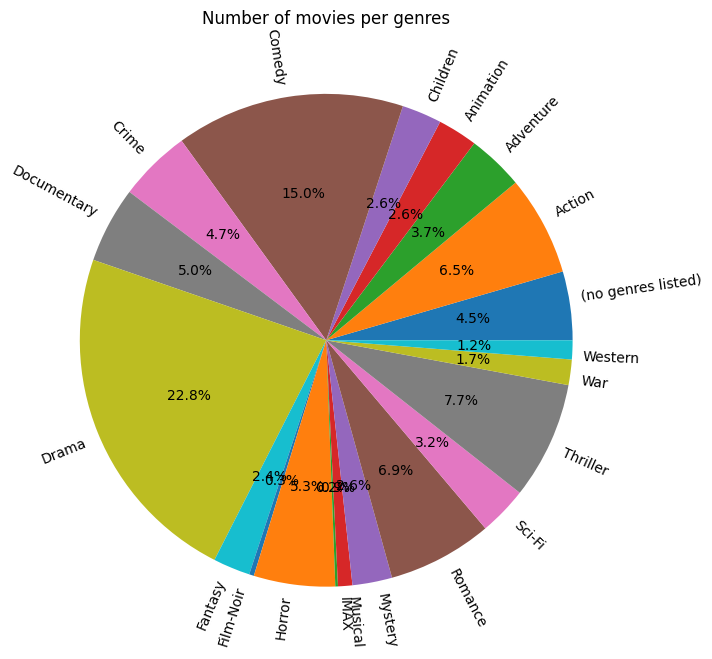

In [24]:
plt.figure(figsize=(15,8))
plt.pie(movie_get.sum(),labels=movie_get.sum().index,autopct="%.1f%%",labeldistance=1.04,rotatelabels=True)
plt.title("Number of movies per genres")
plt.show()

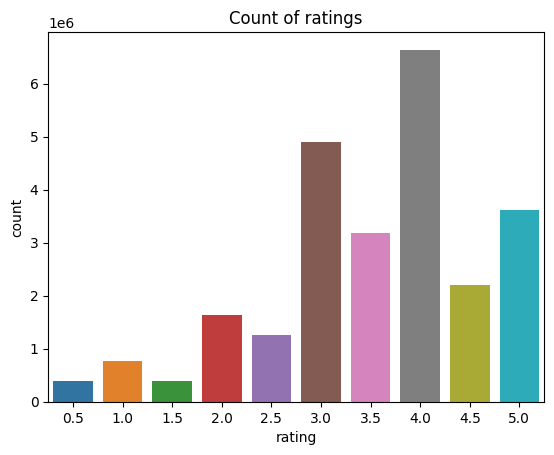

In [25]:
sns.countplot(data=rating, x='rating')
plt.title('Count of ratings')
plt.show()

In [36]:
movie_feature=movie.drop(["title","genres"],axis=1)

In [38]:
movie_feature.head()

,movieId
0,1
1,2
2,3
3,4
4,5


In [39]:
data=pd.merge(movie_feature,movie_get,left_index=True,right_index=True)

In [40]:
data

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62419,209159,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62420,209163,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62421,209169,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
model=NearestNeighbors(n_neighbors=10,metric="cosine")
model.fit(data.iloc[:,1:])

NearestNeighbors(metric='cosine', n_neighbors=10)

In [68]:
def recommend_movies(title, model):
    index = movie[movie['title'] == title].index[0]
    features=pd.DataFrame(data.iloc[index, 1:]).transpose()
    # Find the n nearest neighbors based on the cosine similarity
    distances, indices = model.kneighbors(features)
    print(distances)
    print(indices)
    # Get the attributes of the nearest neighbor movies
    recommended_movies = pd.DataFrame([movie.iloc[idx] for idx in indices.flatten()])
    #recommended_movies['distance'] = distances.flatten()
    return recommended_movies

In [70]:
recommend_movies("Father of the Bride Part II (1995)",model)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[54372 27360 50395 38209 30359 38206 30357 50402 57347 30358]]


,movieId,title,genres
54372,189417,"Thi Mai, rumbo a Vietnam (2018)",Comedy
27360,128946,Hotel Hell Vacation (2010),Comedy
50395,180939,That Certain Age (1938),Comedy
38209,154329,Loafing and Camouflage: Sirens in the Aegean (...,Comedy
30359,136046,The Marquis of Grillo (1981),Comedy
38206,154323,Κλέφτες (2007),Comedy
30357,136038,Christmas Vacation '91 (1991),Comedy
50402,180953,The Carer (2016),Comedy
57347,196163,March's Child (1958),Comedy
30358,136040,Taste of Life (1988),Comedy
